# Tugas Besar IF3270 Pembelajaran Mesin
## Bagian A: Implementasi Forward Propagation untuk Feed Forward Neural Network

Anggota kelompok:

1. Christine Hutabarat (13520005)
2. Hana Fathiyah (13520047)
3. Yohana Golkaria Nainggolan (13520053)
4. Alifia Rahmah (13520122)



## 1. Perancangan struktur file eksternal untuk penyimpanan model

Struktur file:
```
<jumlah layer>
<jumlah neuron layer 1> <linear/relu/sigmoid/softmax>
<jumlah neuron layer 2> <linear/relu/sigmoid/softmax>
...
<jumlah neuron layer n> <linear/relu/sigmoid/softmax>
<initial weight layer 1>
```

Contoh:
```
3
1 linear
5 sigmoid
2 relu
15
```

```
2
2 linear
1 sigmoid
3 5
```

### Deklarasi kelas Neuron, Layer, dan Model (WIP_

In [12]:
class Neuron:
  def __init__(self, weight=0, id=''):
    self.weight = weight
    self.id = id

  def update_weight(self, new_weight):
    self.weight = new_weight

  def __str__(self):
    return f'<{self.id} = {self.weight}>'

class Layer:
  # id: number (0, 1, 2, ...)
  # activation: linear | relu | sigmoid | softmax
  # neurons: Neuron[]
  
  def __init__(self, activation, id=0):
    self.activation = activation
    self.id = id
    self.neurons = []

  def __str__(self):
    s = f'''layer {self.id}
  activation: {self.activation}
  neuron count: {len(self.neurons)}
  neurons:'''
    for n in self.neurons:
      s += str(n)
    return s

  def add_neuron(self):
    self.neurons.append(Neuron(id=f'f{self.id}{len(self.neurons)+1}'))

class Model:
  # layers: Layer[]

  def __init__(self):
    self.layers = []

  def __str__(self):
    s = ''
    for layer in self.layers:
      s += str(layer)
      s += '\n'
    return s

  def add_layer(self, activation, id):
    self.layers.append(Layer(activation, id))

  def add_neuron(self, layer_id):
    self.layers[layer_id].add_neuron()

In [13]:
m = Model()
m.add_layer('linear', 0)
m.add_neuron(0)
m.add_layer('relu', 1)
m.add_neuron(0)
m.add_neuron(1)
m.layers[0].neurons[1].update_weight(5)
print(m)

layer 0
  activation: linear
  neuron count: 2
  neurons:<f01 = 0><f02 = 5>
layer 1
  activation: relu
  neuron count: 1
  neurons:<f11 = 0>



## 2. Implementasi load dari file teks

In [17]:
file = open("sample.txt", 'w')
file.write('''3
1 linear
5 sigmoid
2 relu
15''')
file.close()

In [31]:
def load_file(filename):
  f = open(filename)
  layercount = int(f.readline().strip())
  layers = []
  initweight = []
  for line in f:
    layers.append(line.strip().split(' '))
  initweight = list(map(int,layers.pop())))
  for l in layers:
    l[0] = int(l[0])
  return layercount, layers, initweight

In [32]:
layercount, layers, initweight = load_file("sample.txt")
print(layercount)
print(layers)
print(initweight)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

## 3. Implementasi forward propagation

### a. Menampilkan struktur jaringan

In [6]:
def draw_compact_structure(layers):
  print(f'x({layers[0][0]})\t= {layers[0][1]}')
  print(' ↓ ')
  for i in range(1, len(layers)-1):
    print(f'h{i}({layers[i][0]})\t= {layers[i][1]}')
    print(' ↓ ')
  print(f'y({layers[i+1][0]})\t= {layers[i+1][1]}')

In [7]:
draw_compact_structure(layers)

x(2)	= linear
 ↓ 
h1(5)	= sigmoid
 ↓ 
y(3)	= relu


In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_structure(layers):
  G = nx.Graph()

  # input
  for i in range(layers[0][0]+1): # neuron+bias
    G.add_node(f'x{i}', pos=(1, i+1)) # x1, x2, ...

  # hidden
  for i in range(1, len(layers)-1): # layer+bias
    for j in range(layers[i][0]+1): # neuron+bias
      G.add_node(f'h{i}{j}', pos=(i+1, j+1)) # hi0, hi1, .., hij
      for k in range(layers[i-1][0]+1):
        G.add_edge(f'x{k}', f'h{i}{j}')

  # output
  for i in range(layers[-1][0]): # neuron+bias
    for j in range(layers[-2][0]+1): # last hidden layer
      G.add_node(f'o{i+1}', pos=(len(layers), i+1))
      G.add_edge(f'h{len(layers)-2}{j}', f'o{i+1}')

  pos = nx.get_node_attributes(G, 'pos')
  fig, ax = plt.subplots()
  nx.draw_networkx_nodes(G, pos, ax=ax, node_size=1000)
  nx.draw_networkx_edges(G, pos, ax=ax)
  labels = {n: n for n in G.nodes()}
  nx.draw_networkx_labels(G, pos, labels, font_color='white', ax=ax)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.show()

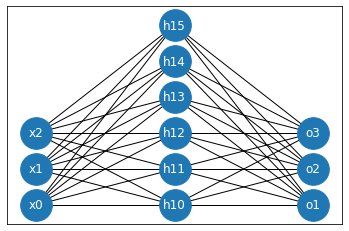

In [15]:
draw_structure(layers)

### b. Memprediksi output untuk input 1 instance

In [10]:
# Helper function
from math import exp

# net -> persamaan linear (ax+b+...)

def linear(net):
  return net

def relu(net):
  return max(0, net)

def sigmoid(net):
  return 1/(1 + exp(net * -1))

def softmax(net_i, arr_net):
  net_sum = 0
  for i in arr_net:
    net_sum += i
  return (exp(net_i))/net_sum

In [11]:
a = 5
sigmoid(5*a+1)

0.999999999994891

c. Memprediksi output untuk input batch sejumlah instances

## 4. Pengujian kebenaran fungsional